### 0307_10000_02.27 testing 1.09

In [1]:
# import part
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop
from keras import backend as K
import matplotlib.pyplot as plt

# loading data
X_train = np.loadtxt("0307_spec_train_280000data_3columns.txt")
y_train = np.loadtxt("0307_mask_train_280000data_3columns.txt")
X_train = X_train[0:1000]
y_train = y_train[0:1000]


/home/william/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
X_train.shape
y_train.shape

(1000, 1536)

In [3]:
# No hiden layer. just fully connected
# sigmoid as activation function
model = Sequential([
    Dense(1536, input_dim=1536),
    Activation('relu'), 
    Dense(1536),
    Activation('relu'), 
    Dense(1536),
    Activation('relu'),  
    Dense(1536),
    Activation('hard_sigmoid'),  # ,sigmoid softmax
    #Dense(247),
    #Activation('relu'),
    #Dense(2470),
    #Activation('sigmoid')
])

In [4]:
# optimizer

rmsprop = RMSprop(lr=0.0001, rho=0.9, epsilon=1e-8, decay=0.0)


def mean_pred(y_true, y_pred):
    return K.mean(y_pred)


model.compile(
    optimizer=rmsprop,
    loss='mean_squared_error',
    metrics=['accuracy']  # , mean_pred]
)
print('Train-------------------------')

history = model.fit(X_train, y_train, validation_split=0.25, epochs=5000, shuffle = True, batch_size=75, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])
layer_output1 = get_3rd_layer_output([X_train])[0]

print(layer_output1)

Train-------------------------
Train on 750 samples, validate on 250 samples
Epoch 1/5000
750/750 [==============================] - 1s 1ms/step - loss: 0.1708 - acc: 0.0000e+00 - val_loss: 0.0574 - val_acc: 0.0000e+00
Epoch 2/5000
750/750 [==============================] - 0s 292us/step - loss: 0.0414 - acc: 0.0013 - val_loss: 0.0370 - val_acc: 0.0000e+00
Epoch 3/5000
750/750 [==============================] - 0s 291us/step - loss: 0.0346 - acc: 0.0147 - val_loss: 0.0353 - val_acc: 0.0040
Epoch 4/5000
750/750 [==============================] - 0s 292us/step - loss: 0.0336 - acc: 0.0093 - val_loss: 0.0345 - val_acc: 0.0000e+00
Epoch 5/5000
750/750 [==============================] - 0s 293us/step - loss: 0.0331 - acc: 0.0133 - val_loss: 0.0339 - val_acc: 0.0000e+00
Epoch 6/5000
750/750 [==============================] - 0s 293us/step - loss: 0.0324 - acc: 0.0187 - val_loss: 0.0332 - val_acc: 0.0320
Epoch 7/5000
750/750 [==============================] - 0s 292us/step - loss: 0.0316 - ac

750/750 [==============================] - 0s 291us/step - loss: 0.0179 - acc: 0.2267 - val_loss: 0.0250 - val_acc: 0.1320
Epoch 61/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0182 - acc: 0.2307 - val_loss: 0.0235 - val_acc: 0.2160
Epoch 62/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0176 - acc: 0.2400 - val_loss: 0.0241 - val_acc: 0.2040
Epoch 63/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0180 - acc: 0.2440 - val_loss: 0.0235 - val_acc: 0.2000
Epoch 64/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0177 - acc: 0.2493 - val_loss: 0.0252 - val_acc: 0.1640
Epoch 65/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0176 - acc: 0.2507 - val_loss: 0.0234 - val_acc: 0.2360
Epoch 66/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0175 - acc: 0.2520 - val_loss: 0.0240 - val_acc: 0.1720
Epoch 67/5000
750/750 [==============================] 

Epoch 120/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0145 - acc: 0.3813 - val_loss: 0.0234 - val_acc: 0.3000
Epoch 121/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0143 - acc: 0.3573 - val_loss: 0.0230 - val_acc: 0.3120
Epoch 122/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0144 - acc: 0.3747 - val_loss: 0.0231 - val_acc: 0.3120
Epoch 123/5000
750/750 [==============================] - 0s 291us/step - loss: 0.0140 - acc: 0.3787 - val_loss: 0.0235 - val_acc: 0.3080
Epoch 124/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0145 - acc: 0.3747 - val_loss: 0.0231 - val_acc: 0.3080
Epoch 125/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0140 - acc: 0.3800 - val_loss: 0.0232 - val_acc: 0.3400
Epoch 126/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0145 - acc: 0.3987 - val_loss: 0.0234 - val_acc: 0.3000
Epoch 127/5000
750/750 [==========

750/750 [==============================] - 0s 291us/step - loss: 0.0122 - acc: 0.4547 - val_loss: 0.0236 - val_acc: 0.3680
Epoch 180/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0124 - acc: 0.4600 - val_loss: 0.0234 - val_acc: 0.3960
Epoch 181/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0121 - acc: 0.4653 - val_loss: 0.0232 - val_acc: 0.3880
Epoch 182/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0124 - acc: 0.4693 - val_loss: 0.0233 - val_acc: 0.3920
Epoch 183/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0120 - acc: 0.4653 - val_loss: 0.0242 - val_acc: 0.3640
Epoch 184/5000
750/750 [==============================] - 0s 291us/step - loss: 0.0124 - acc: 0.4667 - val_loss: 0.0233 - val_acc: 0.3800
Epoch 185/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0119 - acc: 0.4787 - val_loss: 0.0236 - val_acc: 0.3840
Epoch 186/5000
750/750 [=========================

750/750 [==============================] - 0s 289us/step - loss: 0.0108 - acc: 0.5333 - val_loss: 0.0235 - val_acc: 0.3920
Epoch 239/5000
750/750 [==============================] - 0s 293us/step - loss: 0.0109 - acc: 0.5267 - val_loss: 0.0236 - val_acc: 0.3880
Epoch 240/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0107 - acc: 0.5347 - val_loss: 0.0243 - val_acc: 0.3720
Epoch 241/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0107 - acc: 0.5267 - val_loss: 0.0235 - val_acc: 0.4080
Epoch 242/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0110 - acc: 0.5320 - val_loss: 0.0235 - val_acc: 0.4000
Epoch 243/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0104 - acc: 0.5373 - val_loss: 0.0237 - val_acc: 0.4000
Epoch 244/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0110 - acc: 0.5440 - val_loss: 0.0236 - val_acc: 0.3960
Epoch 245/5000
750/750 [=========================

750/750 [==============================] - 0s 292us/step - loss: 0.0098 - acc: 0.6093 - val_loss: 0.0240 - val_acc: 0.4080
Epoch 298/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0095 - acc: 0.6000 - val_loss: 0.0251 - val_acc: 0.4000
Epoch 299/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0099 - acc: 0.6040 - val_loss: 0.0239 - val_acc: 0.4160
Epoch 300/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0095 - acc: 0.6080 - val_loss: 0.0253 - val_acc: 0.4360
Epoch 301/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0098 - acc: 0.6107 - val_loss: 0.0241 - val_acc: 0.4160
Epoch 302/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0096 - acc: 0.6187 - val_loss: 0.0259 - val_acc: 0.4160
Epoch 303/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0097 - acc: 0.6027 - val_loss: 0.0239 - val_acc: 0.4280
Epoch 304/5000
750/750 [=========================

750/750 [==============================] - 0s 292us/step - loss: 0.0092 - acc: 0.6240 - val_loss: 0.0244 - val_acc: 0.4120
Epoch 357/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0088 - acc: 0.6667 - val_loss: 0.0247 - val_acc: 0.4400
Epoch 358/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0094 - acc: 0.6467 - val_loss: 0.0243 - val_acc: 0.4240
Epoch 359/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0088 - acc: 0.6680 - val_loss: 0.0249 - val_acc: 0.4240
Epoch 360/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0091 - acc: 0.6520 - val_loss: 0.0244 - val_acc: 0.4120
Epoch 361/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0089 - acc: 0.6493 - val_loss: 0.0244 - val_acc: 0.4200
Epoch 362/5000
750/750 [==============================] - 0s 292us/step - loss: 0.0091 - acc: 0.6427 - val_loss: 0.0242 - val_acc: 0.4280
Epoch 363/5000
750/750 [=========================

750/750 [==============================] - 0s 299us/step - loss: 0.0084 - acc: 0.7147 - val_loss: 0.0254 - val_acc: 0.4200
Epoch 416/5000
750/750 [==============================] - 0s 296us/step - loss: 0.0090 - acc: 0.6973 - val_loss: 0.0246 - val_acc: 0.4320
Epoch 417/5000
750/750 [==============================] - 0s 296us/step - loss: 0.0084 - acc: 0.7453 - val_loss: 0.0248 - val_acc: 0.4280
Epoch 418/5000
750/750 [==============================] - 0s 297us/step - loss: 0.0089 - acc: 0.6787 - val_loss: 0.0246 - val_acc: 0.4400
Epoch 419/5000
750/750 [==============================] - 0s 293us/step - loss: 0.0084 - acc: 0.7227 - val_loss: 0.0249 - val_acc: 0.4480
Epoch 420/5000
750/750 [==============================] - 0s 291us/step - loss: 0.0086 - acc: 0.6947 - val_loss: 0.0245 - val_acc: 0.4440
Epoch 421/5000
750/750 [==============================] - 0s 293us/step - loss: 0.0088 - acc: 0.7160 - val_loss: 0.0250 - val_acc: 0.4160
Epoch 422/5000
750/750 [=========================

750/750 [==============================] - 0s 291us/step - loss: 0.0087 - acc: 0.7360 - val_loss: 0.0248 - val_acc: 0.4480
Epoch 475/5000
750/750 [==============================] - 0s 291us/step - loss: 0.0082 - acc: 0.7547 - val_loss: 0.0248 - val_acc: 0.4320
Epoch 476/5000
750/750 [==============================] - 0s 293us/step - loss: 0.0084 - acc: 0.7347 - val_loss: 0.0252 - val_acc: 0.4360
Epoch 477/5000
750/750 [==============================] - 0s 296us/step - loss: 0.0084 - acc: 0.7520 - val_loss: 0.0248 - val_acc: 0.4520
Epoch 478/5000
750/750 [==============================] - 0s 297us/step - loss: 0.0083 - acc: 0.7493 - val_loss: 0.0255 - val_acc: 0.4240
Epoch 479/5000
750/750 [==============================] - 0s 300us/step - loss: 0.0087 - acc: 0.7267 - val_loss: 0.0248 - val_acc: 0.4480
Epoch 480/5000
750/750 [==============================] - 0s 295us/step - loss: 0.0082 - acc: 0.7720 - val_loss: 0.0248 - val_acc: 0.4440
Epoch 481/5000
750/750 [=========================

750/750 [==============================] - 0s 292us/step - loss: 0.0083 - acc: 0.7760 - val_loss: 0.0250 - val_acc: 0.4440
Epoch 534/5000
750/750 [==============================] - 0s 291us/step - loss: 0.0081 - acc: 0.7960 - val_loss: 0.0251 - val_acc: 0.4560
Epoch 535/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0081 - acc: 0.8053 - val_loss: 0.0257 - val_acc: 0.4160
Epoch 536/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0087 - acc: 0.7507 - val_loss: 0.0250 - val_acc: 0.4440
Epoch 537/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0081 - acc: 0.8000 - val_loss: 0.0251 - val_acc: 0.4600
Epoch 538/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0081 - acc: 0.7973 - val_loss: 0.0254 - val_acc: 0.4440
Epoch 539/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0084 - acc: 0.7400 - val_loss: 0.0250 - val_acc: 0.4640
Epoch 540/5000
750/750 [=========================

750/750 [==============================] - 0s 295us/step - loss: 0.0084 - acc: 0.7800 - val_loss: 0.0251 - val_acc: 0.4480
Epoch 593/5000
750/750 [==============================] - 0s 295us/step - loss: 0.0080 - acc: 0.8307 - val_loss: 0.0251 - val_acc: 0.4600
Epoch 594/5000
750/750 [==============================] - 0s 296us/step - loss: 0.0080 - acc: 0.8280 - val_loss: 0.0252 - val_acc: 0.4720
Epoch 595/5000
750/750 [==============================] - 0s 296us/step - loss: 0.0086 - acc: 0.7493 - val_loss: 0.0252 - val_acc: 0.4520
Epoch 596/5000
750/750 [==============================] - 0s 297us/step - loss: 0.0080 - acc: 0.8333 - val_loss: 0.0252 - val_acc: 0.4480
Epoch 597/5000
750/750 [==============================] - 0s 299us/step - loss: 0.0080 - acc: 0.8440 - val_loss: 0.0252 - val_acc: 0.4560
Epoch 598/5000
750/750 [==============================] - 0s 298us/step - loss: 0.0080 - acc: 0.8280 - val_loss: 0.0256 - val_acc: 0.4480
Epoch 599/5000
750/750 [=========================

750/750 [==============================] - 0s 292us/step - loss: 0.0080 - acc: 0.8467 - val_loss: 0.0252 - val_acc: 0.4440
Epoch 652/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0080 - acc: 0.8467 - val_loss: 0.0252 - val_acc: 0.4520
Epoch 653/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0085 - acc: 0.7920 - val_loss: 0.0254 - val_acc: 0.4640
Epoch 654/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0080 - acc: 0.8573 - val_loss: 0.0252 - val_acc: 0.4520
Epoch 655/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0080 - acc: 0.8600 - val_loss: 0.0252 - val_acc: 0.4560
Epoch 656/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0080 - acc: 0.8280 - val_loss: 0.0259 - val_acc: 0.4000
Epoch 657/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0080 - acc: 0.8387 - val_loss: 0.0252 - val_acc: 0.4600
Epoch 658/5000
750/750 [=========================

750/750 [==============================] - 0s 290us/step - loss: 0.0084 - acc: 0.8240 - val_loss: 0.0254 - val_acc: 0.4560
Epoch 711/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0080 - acc: 0.8787 - val_loss: 0.0253 - val_acc: 0.4640
Epoch 712/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0080 - acc: 0.8840 - val_loss: 0.0253 - val_acc: 0.4520
Epoch 713/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0080 - acc: 0.8800 - val_loss: 0.0253 - val_acc: 0.4640
Epoch 714/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0083 - acc: 0.7693 - val_loss: 0.0254 - val_acc: 0.4720
Epoch 715/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0080 - acc: 0.8787 - val_loss: 0.0254 - val_acc: 0.4680
Epoch 716/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0080 - acc: 0.8893 - val_loss: 0.0253 - val_acc: 0.4480
Epoch 717/5000
750/750 [=========================

750/750 [==============================] - 0s 290us/step - loss: 0.0082 - acc: 0.8227 - val_loss: 0.0254 - val_acc: 0.4560
Epoch 770/5000
750/750 [==============================] - 0s 291us/step - loss: 0.0079 - acc: 0.8960 - val_loss: 0.0254 - val_acc: 0.4600
Epoch 771/5000
750/750 [==============================] - 0s 291us/step - loss: 0.0079 - acc: 0.9000 - val_loss: 0.0254 - val_acc: 0.4640
Epoch 772/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.8907 - val_loss: 0.0255 - val_acc: 0.4680
Epoch 773/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0083 - acc: 0.8520 - val_loss: 0.0269 - val_acc: 0.4440
Epoch 774/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0080 - acc: 0.8920 - val_loss: 0.0254 - val_acc: 0.4600
Epoch 775/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.8987 - val_loss: 0.0254 - val_acc: 0.4640
Epoch 776/5000
750/750 [=========================

750/750 [==============================] - 0s 291us/step - loss: 0.0082 - acc: 0.8347 - val_loss: 0.0254 - val_acc: 0.4720
Epoch 829/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9067 - val_loss: 0.0254 - val_acc: 0.4760
Epoch 830/5000
750/750 [==============================] - 0s 291us/step - loss: 0.0079 - acc: 0.9067 - val_loss: 0.0254 - val_acc: 0.4800
Epoch 831/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9000 - val_loss: 0.0254 - val_acc: 0.4920
Epoch 832/5000
750/750 [==============================] - 0s 291us/step - loss: 0.0083 - acc: 0.8573 - val_loss: 0.0254 - val_acc: 0.4800
Epoch 833/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9080 - val_loss: 0.0254 - val_acc: 0.4840
Epoch 834/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.8973 - val_loss: 0.0254 - val_acc: 0.4800
Epoch 835/5000
750/750 [=========================

750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9187 - val_loss: 0.0255 - val_acc: 0.4720
Epoch 888/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9147 - val_loss: 0.0255 - val_acc: 0.4720
Epoch 889/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0082 - acc: 0.8467 - val_loss: 0.0263 - val_acc: 0.4600
Epoch 890/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0080 - acc: 0.9080 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 891/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9187 - val_loss: 0.0254 - val_acc: 0.4800
Epoch 892/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9173 - val_loss: 0.0254 - val_acc: 0.4720
Epoch 893/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9200 - val_loss: 0.0255 - val_acc: 0.4800
Epoch 894/5000
750/750 [=========================

750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9227 - val_loss: 0.0255 - val_acc: 0.4760
Epoch 947/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9173 - val_loss: 0.0255 - val_acc: 0.4760
Epoch 948/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0083 - acc: 0.8760 - val_loss: 0.0259 - val_acc: 0.4760
Epoch 949/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9080 - val_loss: 0.0255 - val_acc: 0.4720
Epoch 950/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9200 - val_loss: 0.0255 - val_acc: 0.4800
Epoch 951/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9227 - val_loss: 0.0255 - val_acc: 0.4720
Epoch 952/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9173 - val_loss: 0.0255 - val_acc: 0.4720
Epoch 953/5000
750/750 [=========================

750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9240 - val_loss: 0.0255 - val_acc: 0.4760
Epoch 1006/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9227 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1007/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9187 - val_loss: 0.0255 - val_acc: 0.4800
Epoch 1008/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0082 - acc: 0.8587 - val_loss: 0.0255 - val_acc: 0.4720
Epoch 1009/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9227 - val_loss: 0.0255 - val_acc: 0.4800
Epoch 1010/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9280 - val_loss: 0.0255 - val_acc: 0.4760
Epoch 1011/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9253 - val_loss: 0.0255 - val_acc: 0.4840
Epoch 1012/5000
750/750 [==================

750/750 [==============================] - 0s 289us/step - loss: 0.0080 - acc: 0.8800 - val_loss: 0.0266 - val_acc: 0.4640
Epoch 1065/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0081 - acc: 0.8720 - val_loss: 0.0255 - val_acc: 0.4720
Epoch 1066/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9267 - val_loss: 0.0255 - val_acc: 0.4680
Epoch 1067/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9307 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1068/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9267 - val_loss: 0.0255 - val_acc: 0.4680
Epoch 1069/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9227 - val_loss: 0.0256 - val_acc: 0.4680
Epoch 1070/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0082 - acc: 0.8960 - val_loss: 0.0257 - val_acc: 0.4640
Epoch 1071/5000
750/750 [==================

750/750 [==============================] - 0s 290us/step - loss: 0.0081 - acc: 0.8773 - val_loss: 0.0256 - val_acc: 0.4560
Epoch 1124/5000
750/750 [==============================] - 0s 291us/step - loss: 0.0079 - acc: 0.9227 - val_loss: 0.0255 - val_acc: 0.4560
Epoch 1125/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9240 - val_loss: 0.0255 - val_acc: 0.4600
Epoch 1126/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9307 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1127/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9267 - val_loss: 0.0255 - val_acc: 0.4680
Epoch 1128/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9133 - val_loss: 0.0260 - val_acc: 0.4600
Epoch 1129/5000
750/750 [==============================] - 0s 291us/step - loss: 0.0081 - acc: 0.8787 - val_loss: 0.0256 - val_acc: 0.4560
Epoch 1130/5000
750/750 [==================

750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9267 - val_loss: 0.0258 - val_acc: 0.4160
Epoch 1183/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0081 - acc: 0.8413 - val_loss: 0.0255 - val_acc: 0.4680
Epoch 1184/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9227 - val_loss: 0.0256 - val_acc: 0.4760
Epoch 1185/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9307 - val_loss: 0.0255 - val_acc: 0.4760
Epoch 1186/5000
750/750 [==============================] - 0s 291us/step - loss: 0.0079 - acc: 0.9307 - val_loss: 0.0255 - val_acc: 0.4760
Epoch 1187/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9307 - val_loss: 0.0255 - val_acc: 0.4720
Epoch 1188/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0082 - acc: 0.8480 - val_loss: 0.0258 - val_acc: 0.4800
Epoch 1189/5000
750/750 [==================

750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9293 - val_loss: 0.0255 - val_acc: 0.4760
Epoch 1242/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9280 - val_loss: 0.0256 - val_acc: 0.4560
Epoch 1243/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9307 - val_loss: 0.0255 - val_acc: 0.5000
Epoch 1244/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0082 - acc: 0.8720 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1245/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9240 - val_loss: 0.0255 - val_acc: 0.4680
Epoch 1246/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9240 - val_loss: 0.0255 - val_acc: 0.4680
Epoch 1247/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9293 - val_loss: 0.0255 - val_acc: 0.4680
Epoch 1248/5000
750/750 [==================

750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9293 - val_loss: 0.0256 - val_acc: 0.4760
Epoch 1301/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9307 - val_loss: 0.0256 - val_acc: 0.4760
Epoch 1302/5000
750/750 [==============================] - 0s 292us/step - loss: 0.0079 - acc: 0.9267 - val_loss: 0.0256 - val_acc: 0.4760
Epoch 1303/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0081 - acc: 0.8787 - val_loss: 0.0259 - val_acc: 0.4640
Epoch 1304/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9027 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1305/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9253 - val_loss: 0.0256 - val_acc: 0.4480
Epoch 1306/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9293 - val_loss: 0.0256 - val_acc: 0.4560
Epoch 1307/5000
750/750 [==================

750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9320 - val_loss: 0.0256 - val_acc: 0.4760
Epoch 1360/5000
750/750 [==============================] - 0s 292us/step - loss: 0.0079 - acc: 0.9320 - val_loss: 0.0256 - val_acc: 0.4760
Epoch 1361/5000
750/750 [==============================] - 0s 291us/step - loss: 0.0079 - acc: 0.9320 - val_loss: 0.0256 - val_acc: 0.4840
Epoch 1362/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0080 - acc: 0.8573 - val_loss: 0.0262 - val_acc: 0.4760
Epoch 1363/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9147 - val_loss: 0.0256 - val_acc: 0.4680
Epoch 1364/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9240 - val_loss: 0.0255 - val_acc: 0.4680
Epoch 1365/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9307 - val_loss: 0.0255 - val_acc: 0.4680
Epoch 1366/5000
750/750 [==================

750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1419/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0081 - acc: 0.8920 - val_loss: 0.0257 - val_acc: 0.4800
Epoch 1420/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9227 - val_loss: 0.0256 - val_acc: 0.4880
Epoch 1421/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9320 - val_loss: 0.0256 - val_acc: 0.4880
Epoch 1422/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9333 - val_loss: 0.0256 - val_acc: 0.4840
Epoch 1423/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9333 - val_loss: 0.0256 - val_acc: 0.4800
Epoch 1424/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9293 - val_loss: 0.0279 - val_acc: 0.4640
Epoch 1425/5000
750/750 [==================

750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1478/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9187 - val_loss: 0.0261 - val_acc: 0.4600
Epoch 1479/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0080 - acc: 0.8947 - val_loss: 0.0257 - val_acc: 0.4600
Epoch 1480/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4600
Epoch 1481/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4600
Epoch 1482/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4600
Epoch 1483/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4600
Epoch 1484/5000
750/750 [==================

750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1537/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1538/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1539/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1540/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1541/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1542/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1543/5000
750/750 [==================

750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1596/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1597/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1598/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1599/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1600/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1601/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1602/5000
750/750 [==================

750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1655/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1656/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1657/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1658/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1659/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1660/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1661/5000
750/750 [==================

750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1714/5000
750/750 [==============================] - 0s 292us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1715/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1716/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1717/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1718/5000
750/750 [==============================] - 0s 291us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1719/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1720/5000
750/750 [==================

750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1773/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1774/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1775/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1776/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1777/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1778/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1779/5000
750/750 [==================

750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1832/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1833/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1834/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1835/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1836/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1837/5000
750/750 [==============================] - 0s 287us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1838/5000
750/750 [==================

750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1891/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1892/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1893/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1894/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1895/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1896/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1897/5000
750/750 [==================

750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1950/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1951/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1952/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1953/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1954/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1955/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 1956/5000
750/750 [==================

750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2009/5000
750/750 [==============================] - 0s 318us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2010/5000
750/750 [==============================] - 0s 325us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2011/5000
750/750 [==============================] - 0s 302us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2012/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2013/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2014/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2015/5000
750/750 [==================

750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2068/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2069/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2070/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2071/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2072/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2073/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2074/5000
750/750 [==================

750/750 [==============================] - 0s 292us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2127/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2128/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2129/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2130/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2131/5000
750/750 [==============================] - 0s 291us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2132/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2133/5000
750/750 [==================

750/750 [==============================] - 0s 311us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2186/5000
750/750 [==============================] - 0s 295us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2187/5000
750/750 [==============================] - 0s 309us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2188/5000
750/750 [==============================] - 0s 303us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2189/5000
750/750 [==============================] - 0s 306us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2190/5000
750/750 [==============================] - 0s 304us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2191/5000
750/750 [==============================] - 0s 301us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2192/5000
750/750 [==================

750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2245/5000
750/750 [==============================] - 0s 291us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2246/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2247/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2248/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2249/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2250/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2251/5000
750/750 [==================

750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2304/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2305/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2306/5000
750/750 [==============================] - 0s 291us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2307/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2308/5000
750/750 [==============================] - 0s 291us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2309/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2310/5000
750/750 [==================

750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2363/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2364/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2365/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2366/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2367/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2368/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2369/5000
750/750 [==================

750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2422/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2423/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2424/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2425/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2426/5000
750/750 [==============================] - 0s 289us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2427/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2428/5000
750/750 [==================

750/750 [==============================] - 0s 304us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2481/5000
750/750 [==============================] - 0s 304us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2482/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2483/5000
750/750 [==============================] - 0s 288us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2484/5000
750/750 [==============================] - 0s 291us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2485/5000
750/750 [==============================] - 0s 290us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2486/5000
750/750 [==============================] - 0s 292us/step - loss: 0.0079 - acc: 0.9347 - val_loss: 0.0256 - val_acc: 0.4720
Epoch 2487/5000
750/750 [==================

KeyboardInterrupt: 

Train-------------------------
Train on 750 samples, validate on 250 samples
Epoch 1/1500
750/750 [==============================] - 1s 713us/step - loss: 0.1075 - acc: 0.0160 - val_loss: 0.0361 - val_acc: 0.0000e+00
Epoch 2/1500
750/750 [==============================] - 0s 293us/step - loss: 0.0339 - acc: 0.0107 - val_loss: 0.0350 - val_acc: 0.0720
Epoch 3/1500
750/750 [==============================] - 0s 295us/step - loss: 0.0326 - acc: 0.0227 - val_loss: 0.0333 - val_acc: 0.0000e+00
Epoch 4/1500
750/750 [==============================] - 0s 293us/step - loss: 0.0317 - acc: 0.0347 - val_loss: 0.0321 - val_acc: 0.0200
Epoch 5/1500
750/750 [==============================] - 0s 293us/step - loss: 0.0304 - acc: 0.0560 - val_loss: 0.0318 - val_acc: 0.0520
Epoch 6/1500
750/750 [==============================] - 0s 292us/step - loss: 0.0289 - acc: 0.0573 - val_loss: 0.0298 - val_acc: 0.1080
Epoch 7/1500
750/750 [==============================] - 0s 293us/step - loss: 0.0275 - acc: 0.0493 

750/750 [==============================] - 0s 298us/step - loss: 0.0149 - acc: 0.3613 - val_loss: 0.0228 - val_acc: 0.2880
Epoch 61/1500
750/750 [==============================] - 0s 296us/step - loss: 0.0139 - acc: 0.3507 - val_loss: 0.0230 - val_acc: 0.3400
Epoch 62/1500
750/750 [==============================] - 0s 292us/step - loss: 0.0145 - acc: 0.3747 - val_loss: 0.0229 - val_acc: 0.2840
Epoch 63/1500
750/750 [==============================] - 0s 292us/step - loss: 0.0139 - acc: 0.3467 - val_loss: 0.0235 - val_acc: 0.3280
Epoch 64/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0142 - acc: 0.3467 - val_loss: 0.0227 - val_acc: 0.3080
Epoch 65/1500
750/750 [==============================] - 0s 295us/step - loss: 0.0133 - acc: 0.3600 - val_loss: 0.0227 - val_acc: 0.3240
Epoch 66/1500
750/750 [==============================] - 0s 307us/step - loss: 0.0143 - acc: 0.3627 - val_loss: 0.0228 - val_acc: 0.3040
Epoch 67/1500
750/750 [==============================] 

Epoch 120/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0098 - acc: 0.5187 - val_loss: 0.0232 - val_acc: 0.3840
Epoch 121/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0097 - acc: 0.5453 - val_loss: 0.0248 - val_acc: 0.3960
Epoch 122/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0095 - acc: 0.5227 - val_loss: 0.0235 - val_acc: 0.4120
Epoch 123/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0102 - acc: 0.5427 - val_loss: 0.0235 - val_acc: 0.4240
Epoch 124/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0090 - acc: 0.5467 - val_loss: 0.0233 - val_acc: 0.3920
Epoch 125/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0100 - acc: 0.5000 - val_loss: 0.0236 - val_acc: 0.4080
Epoch 126/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0091 - acc: 0.5627 - val_loss: 0.0237 - val_acc: 0.4200
Epoch 127/1500
750/750 [==========

750/750 [==============================] - 0s 290us/step - loss: 0.0078 - acc: 0.6560 - val_loss: 0.0241 - val_acc: 0.4160
Epoch 180/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0074 - acc: 0.6613 - val_loss: 0.0257 - val_acc: 0.4080
Epoch 181/1500
750/750 [==============================] - 0s 291us/step - loss: 0.0082 - acc: 0.6360 - val_loss: 0.0241 - val_acc: 0.4480
Epoch 182/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0071 - acc: 0.6627 - val_loss: 0.0244 - val_acc: 0.4120
Epoch 183/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0077 - acc: 0.6373 - val_loss: 0.0242 - val_acc: 0.4160
Epoch 184/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0078 - acc: 0.6627 - val_loss: 0.0255 - val_acc: 0.3920
Epoch 185/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0072 - acc: 0.6720 - val_loss: 0.0241 - val_acc: 0.4200
Epoch 186/1500
750/750 [=========================

750/750 [==============================] - 0s 298us/step - loss: 0.0065 - acc: 0.7613 - val_loss: 0.0247 - val_acc: 0.4200
Epoch 239/1500
750/750 [==============================] - 0s 305us/step - loss: 0.0067 - acc: 0.7347 - val_loss: 0.0248 - val_acc: 0.4600
Epoch 240/1500
750/750 [==============================] - 0s 291us/step - loss: 0.0071 - acc: 0.6960 - val_loss: 0.0245 - val_acc: 0.4640
Epoch 241/1500
750/750 [==============================] - 0s 313us/step - loss: 0.0065 - acc: 0.7680 - val_loss: 0.0245 - val_acc: 0.4680
Epoch 242/1500
750/750 [==============================] - 0s 298us/step - loss: 0.0074 - acc: 0.7160 - val_loss: 0.0248 - val_acc: 0.4680
Epoch 243/1500
750/750 [==============================] - 0s 305us/step - loss: 0.0067 - acc: 0.7720 - val_loss: 0.0246 - val_acc: 0.4720
Epoch 244/1500
750/750 [==============================] - 0s 310us/step - loss: 0.0065 - acc: 0.7773 - val_loss: 0.0247 - val_acc: 0.4600
Epoch 245/1500
750/750 [=========================

750/750 [==============================] - 0s 291us/step - loss: 0.0063 - acc: 0.8387 - val_loss: 0.0249 - val_acc: 0.4400
Epoch 298/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0066 - acc: 0.7733 - val_loss: 0.0249 - val_acc: 0.4400
Epoch 299/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0063 - acc: 0.8320 - val_loss: 0.0249 - val_acc: 0.4600
Epoch 300/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0068 - acc: 0.8027 - val_loss: 0.0291 - val_acc: 0.3960
Epoch 301/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0068 - acc: 0.7853 - val_loss: 0.0249 - val_acc: 0.4400
Epoch 302/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0063 - acc: 0.8320 - val_loss: 0.0249 - val_acc: 0.4400
Epoch 303/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0065 - acc: 0.7947 - val_loss: 0.0251 - val_acc: 0.4360
Epoch 304/1500
750/750 [=========================

750/750 [==============================] - 0s 290us/step - loss: 0.0068 - acc: 0.7947 - val_loss: 0.0251 - val_acc: 0.4400
Epoch 357/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0063 - acc: 0.8827 - val_loss: 0.0253 - val_acc: 0.4480
Epoch 358/1500
750/750 [==============================] - 0s 291us/step - loss: 0.0063 - acc: 0.8813 - val_loss: 0.0254 - val_acc: 0.4160
Epoch 359/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0068 - acc: 0.7733 - val_loss: 0.0251 - val_acc: 0.4560
Epoch 360/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.8693 - val_loss: 0.0251 - val_acc: 0.4560
Epoch 361/1500
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.8840 - val_loss: 0.0251 - val_acc: 0.4400
Epoch 362/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0068 - acc: 0.8093 - val_loss: 0.0254 - val_acc: 0.4480
Epoch 363/1500
750/750 [=========================

750/750 [==============================] - 0s 288us/step - loss: 0.0062 - acc: 0.9027 - val_loss: 0.0252 - val_acc: 0.4600
Epoch 416/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9053 - val_loss: 0.0251 - val_acc: 0.4680
Epoch 417/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0067 - acc: 0.8427 - val_loss: 0.0253 - val_acc: 0.4440
Epoch 418/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.8933 - val_loss: 0.0252 - val_acc: 0.4560
Epoch 419/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.8933 - val_loss: 0.0252 - val_acc: 0.4600
Epoch 420/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.8960 - val_loss: 0.0252 - val_acc: 0.4600
Epoch 421/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0066 - acc: 0.8587 - val_loss: 0.0253 - val_acc: 0.4640
Epoch 422/1500
750/750 [=========================

750/750 [==============================] - 0s 292us/step - loss: 0.0066 - acc: 0.7987 - val_loss: 0.0254 - val_acc: 0.4680
Epoch 475/1500
750/750 [==============================] - 0s 292us/step - loss: 0.0062 - acc: 0.9093 - val_loss: 0.0254 - val_acc: 0.4840
Epoch 476/1500
750/750 [==============================] - 0s 294us/step - loss: 0.0062 - acc: 0.9147 - val_loss: 0.0253 - val_acc: 0.4720
Epoch 477/1500
750/750 [==============================] - 0s 297us/step - loss: 0.0062 - acc: 0.9160 - val_loss: 0.0253 - val_acc: 0.4760
Epoch 478/1500
750/750 [==============================] - 0s 296us/step - loss: 0.0064 - acc: 0.8827 - val_loss: 0.0263 - val_acc: 0.4280
Epoch 479/1500
750/750 [==============================] - 0s 298us/step - loss: 0.0065 - acc: 0.8640 - val_loss: 0.0253 - val_acc: 0.4520
Epoch 480/1500
750/750 [==============================] - 0s 297us/step - loss: 0.0062 - acc: 0.9147 - val_loss: 0.0253 - val_acc: 0.4640
Epoch 481/1500
750/750 [=========================

750/750 [==============================] - 0s 299us/step - loss: 0.0066 - acc: 0.8720 - val_loss: 0.0256 - val_acc: 0.4960
Epoch 534/1500
750/750 [==============================] - 0s 293us/step - loss: 0.0063 - acc: 0.9000 - val_loss: 0.0254 - val_acc: 0.4640
Epoch 535/1500
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9147 - val_loss: 0.0253 - val_acc: 0.4720
Epoch 536/1500
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9187 - val_loss: 0.0253 - val_acc: 0.4760
Epoch 537/1500
750/750 [==============================] - 0s 295us/step - loss: 0.0062 - acc: 0.9160 - val_loss: 0.0256 - val_acc: 0.4440
Epoch 538/1500
750/750 [==============================] - 0s 297us/step - loss: 0.0065 - acc: 0.8133 - val_loss: 0.0254 - val_acc: 0.4720
Epoch 539/1500
750/750 [==============================] - 0s 299us/step - loss: 0.0062 - acc: 0.9160 - val_loss: 0.0254 - val_acc: 0.4840
Epoch 540/1500
750/750 [=========================

750/750 [==============================] - 0s 300us/step - loss: 0.0062 - acc: 0.9240 - val_loss: 0.0254 - val_acc: 0.4680
Epoch 593/1500
750/750 [==============================] - 0s 294us/step - loss: 0.0062 - acc: 0.9293 - val_loss: 0.0254 - val_acc: 0.4640
Epoch 594/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9253 - val_loss: 0.0254 - val_acc: 0.4640
Epoch 595/1500
750/750 [==============================] - 0s 291us/step - loss: 0.0065 - acc: 0.8480 - val_loss: 0.0256 - val_acc: 0.4800
Epoch 596/1500
750/750 [==============================] - 0s 292us/step - loss: 0.0062 - acc: 0.9160 - val_loss: 0.0255 - val_acc: 0.4960
Epoch 597/1500
750/750 [==============================] - 0s 292us/step - loss: 0.0062 - acc: 0.9227 - val_loss: 0.0255 - val_acc: 0.4800
Epoch 598/1500
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9200 - val_loss: 0.0254 - val_acc: 0.4880
Epoch 599/1500
750/750 [=========================

750/750 [==============================] - 0s 292us/step - loss: 0.0062 - acc: 0.9240 - val_loss: 0.0255 - val_acc: 0.4720
Epoch 652/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9267 - val_loss: 0.0255 - val_acc: 0.4680
Epoch 653/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9293 - val_loss: 0.0254 - val_acc: 0.4680
Epoch 654/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0065 - acc: 0.8920 - val_loss: 0.0255 - val_acc: 0.4840
Epoch 655/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9213 - val_loss: 0.0255 - val_acc: 0.4800
Epoch 656/1500
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9320 - val_loss: 0.0255 - val_acc: 0.4800
Epoch 657/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9320 - val_loss: 0.0255 - val_acc: 0.4760
Epoch 658/1500
750/750 [=========================

750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 711/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 712/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 713/1500
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 714/1500
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 715/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 716/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 717/1500
750/750 [=========================

750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 770/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 771/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 772/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 773/1500
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 774/1500
750/750 [==============================] - 0s 288us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 775/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 776/1500
750/750 [=========================

750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 829/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 830/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 831/1500
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 832/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 833/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 834/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 835/1500
750/750 [=========================

750/750 [==============================] - 0s 288us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 888/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 889/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 890/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 891/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 892/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 893/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 894/1500
750/750 [=========================

750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 947/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 948/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 949/1500
750/750 [==============================] - 0s 288us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 950/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 951/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 952/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 953/1500
750/750 [=========================

750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1006/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1007/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1008/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1009/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1010/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1011/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1012/1500
750/750 [==================

750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1065/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1066/1500
750/750 [==============================] - 0s 300us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1067/1500
750/750 [==============================] - 0s 301us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1068/1500
750/750 [==============================] - 0s 296us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1069/1500
750/750 [==============================] - 0s 303us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1070/1500
750/750 [==============================] - 0s 293us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1071/1500
750/750 [==================

750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1124/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1125/1500
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1126/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1127/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1128/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1129/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1130/1500
750/750 [==================

750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1183/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1184/1500
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1185/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1186/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1187/1500
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1188/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1189/1500
750/750 [==================

750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1242/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1243/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1244/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1245/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1246/1500
750/750 [==============================] - 0s 292us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1247/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1248/1500
750/750 [==================

750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1301/1500
750/750 [==============================] - 0s 298us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1302/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1303/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1304/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1305/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1306/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1307/1500
750/750 [==================

750/750 [==============================] - 0s 292us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1360/1500
750/750 [==============================] - 0s 292us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1361/1500
750/750 [==============================] - 0s 292us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1362/1500
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1363/1500
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1364/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1365/1500
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1366/1500
750/750 [==================

750/750 [==============================] - 0s 298us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1419/1500
750/750 [==============================] - 0s 297us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1420/1500
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1421/1500
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1422/1500
750/750 [==============================] - 0s 296us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1423/1500
750/750 [==============================] - 0s 302us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1424/1500
750/750 [==============================] - 0s 293us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1425/1500
750/750 [==================

750/750 [==============================] - 0s 297us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1478/1500
750/750 [==============================] - 0s 296us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1479/1500
750/750 [==============================] - 0s 296us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1480/1500
750/750 [==============================] - 0s 297us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1481/1500
750/750 [==============================] - 0s 299us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1482/1500
750/750 [==============================] - 0s 295us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1483/1500
750/750 [==============================] - 0s 292us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0255 - val_acc: 0.4640
Epoch 1484/1500
750/750 [==================

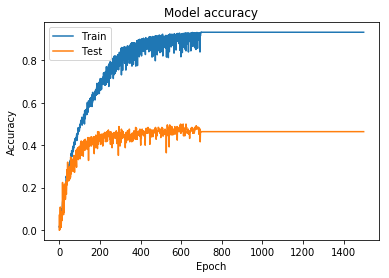

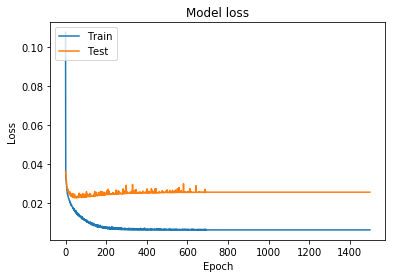

[[0.07069807 0.         0.         ... 0.00361155 0.         0.03991486]
 [0.06323269 0.20749325 0.1545828  ... 0.0924642  0.         0.        ]
 [0.17384645 0.18384928 0.08450308 ... 0.18636617 0.         0.13536291]
 ...
 [0.         0.         0.11768516 ... 0.0398413  0.         0.        ]
 [0.         0.17738959 0.         ... 0.         0.         0.33059457]
 [0.06088046 0.10166567 0.0660789  ... 0.00283925 0.         0.        ]]


In [5]:
# No hiden layer. just fully connected
# sigmoid as activation function
model = Sequential([
    Dense(1536, input_dim=1536),
    Activation('relu'), 
    Dense(1536),
    Activation('relu'), 
    Dense(1536),
    Activation('relu'),  
    Dense(1536),
    Activation('hard_sigmoid'),  # ,sigmoid softmax
    #Dense(247),
    #Activation('relu'),
    #Dense(2470),
    #Activation('sigmoid')
])

# optimizer

rmsprop = RMSprop(lr=0.0002, rho=0.9, epsilon=1e-8, decay=0.0)


def mean_pred(y_true, y_pred):
    return K.mean(y_pred)


model.compile(
    optimizer=rmsprop,
    loss='mean_squared_error',
    metrics=['accuracy']  # , mean_pred]
)
print('Train-------------------------')

history = model.fit(X_train, y_train, validation_split=0.25, epochs=1500, shuffle = True, batch_size=75, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])
layer_output1 = get_3rd_layer_output([X_train])[0]

print(layer_output1)

Train-------------------------
Train on 750 samples, validate on 250 samples
Epoch 1/800
750/750 [==============================] - 1s 732us/step - loss: 0.0758 - acc: 0.0013 - val_loss: 0.0348 - val_acc: 0.0040
Epoch 2/800
750/750 [==============================] - 0s 293us/step - loss: 0.0326 - acc: 0.0080 - val_loss: 0.0319 - val_acc: 0.0200
Epoch 3/800
750/750 [==============================] - 0s 292us/step - loss: 0.0307 - acc: 0.0453 - val_loss: 0.0308 - val_acc: 0.0040
Epoch 4/800
750/750 [==============================] - 0s 294us/step - loss: 0.0288 - acc: 0.0307 - val_loss: 0.0310 - val_acc: 0.1440
Epoch 5/800
750/750 [==============================] - 0s 291us/step - loss: 0.0277 - acc: 0.0813 - val_loss: 0.0285 - val_acc: 0.0600
Epoch 6/800
750/750 [==============================] - 0s 293us/step - loss: 0.0260 - acc: 0.0773 - val_loss: 0.0281 - val_acc: 0.0240
Epoch 7/800
750/750 [==============================] - 0s 293us/step - loss: 0.0250 - acc: 0.0653 - val_loss: 0.0

Epoch 61/800
750/750 [==============================] - 0s 291us/step - loss: 0.0099 - acc: 0.5600 - val_loss: 0.0280 - val_acc: 0.3560
Epoch 62/800
750/750 [==============================] - 0s 291us/step - loss: 0.0094 - acc: 0.5973 - val_loss: 0.0246 - val_acc: 0.3920
Epoch 63/800
750/750 [==============================] - 0s 290us/step - loss: 0.0093 - acc: 0.5453 - val_loss: 0.0246 - val_acc: 0.4280
Epoch 64/800
750/750 [==============================] - 0s 291us/step - loss: 0.0100 - acc: 0.5880 - val_loss: 0.0239 - val_acc: 0.4040
Epoch 65/800
750/750 [==============================] - 0s 289us/step - loss: 0.0086 - acc: 0.5733 - val_loss: 0.0244 - val_acc: 0.4600
Epoch 66/800
750/750 [==============================] - 0s 290us/step - loss: 0.0093 - acc: 0.6000 - val_loss: 0.0271 - val_acc: 0.3920
Epoch 67/800
750/750 [==============================] - 0s 288us/step - loss: 0.0094 - acc: 0.5787 - val_loss: 0.0244 - val_acc: 0.4280
Epoch 68/800
750/750 [==========================

750/750 [==============================] - 0s 292us/step - loss: 0.0065 - acc: 0.7987 - val_loss: 0.0254 - val_acc: 0.4560
Epoch 122/800
750/750 [==============================] - 0s 291us/step - loss: 0.0066 - acc: 0.7613 - val_loss: 0.0259 - val_acc: 0.4760
Epoch 123/800
750/750 [==============================] - 0s 304us/step - loss: 0.0067 - acc: 0.7960 - val_loss: 0.0255 - val_acc: 0.4600
Epoch 124/800
750/750 [==============================] - 0s 297us/step - loss: 0.0068 - acc: 0.8040 - val_loss: 0.0267 - val_acc: 0.4000
Epoch 125/800
750/750 [==============================] - 0s 299us/step - loss: 0.0069 - acc: 0.7880 - val_loss: 0.0255 - val_acc: 0.4480
Epoch 126/800
750/750 [==============================] - 0s 296us/step - loss: 0.0065 - acc: 0.8400 - val_loss: 0.0259 - val_acc: 0.4000
Epoch 127/800
750/750 [==============================] - 0s 296us/step - loss: 0.0066 - acc: 0.7867 - val_loss: 0.0267 - val_acc: 0.4840
Epoch 128/800
750/750 [==============================] 

Epoch 181/800
750/750 [==============================] - 0s 294us/step - loss: 0.0063 - acc: 0.8813 - val_loss: 0.0256 - val_acc: 0.4920
Epoch 182/800
750/750 [==============================] - 0s 290us/step - loss: 0.0063 - acc: 0.8573 - val_loss: 0.0266 - val_acc: 0.4720
Epoch 183/800
750/750 [==============================] - 0s 289us/step - loss: 0.0071 - acc: 0.8160 - val_loss: 0.0258 - val_acc: 0.4800
Epoch 184/800
750/750 [==============================] - 0s 291us/step - loss: 0.0063 - acc: 0.8907 - val_loss: 0.0260 - val_acc: 0.4880
Epoch 185/800
750/750 [==============================] - 0s 292us/step - loss: 0.0063 - acc: 0.8987 - val_loss: 0.0259 - val_acc: 0.4840
Epoch 186/800
750/750 [==============================] - 0s 297us/step - loss: 0.0063 - acc: 0.9080 - val_loss: 0.0259 - val_acc: 0.4680
Epoch 187/800
750/750 [==============================] - 0s 303us/step - loss: 0.0070 - acc: 0.8413 - val_loss: 0.0265 - val_acc: 0.4760
Epoch 188/800
750/750 [==================

Epoch 241/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9227 - val_loss: 0.0261 - val_acc: 0.4760
Epoch 242/800
750/750 [==============================] - 0s 290us/step - loss: 0.0065 - acc: 0.8613 - val_loss: 0.0275 - val_acc: 0.4080
Epoch 243/800
750/750 [==============================] - 0s 290us/step - loss: 0.0063 - acc: 0.8800 - val_loss: 0.0261 - val_acc: 0.4760
Epoch 244/800
750/750 [==============================] - 0s 292us/step - loss: 0.0062 - acc: 0.9200 - val_loss: 0.0262 - val_acc: 0.4960
Epoch 245/800
750/750 [==============================] - 0s 292us/step - loss: 0.0063 - acc: 0.9067 - val_loss: 0.0265 - val_acc: 0.4800
Epoch 246/800
750/750 [==============================] - 0s 289us/step - loss: 0.0063 - acc: 0.9013 - val_loss: 0.0264 - val_acc: 0.4560
Epoch 247/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.8987 - val_loss: 0.0263 - val_acc: 0.5120
Epoch 248/800
750/750 [==================

Epoch 301/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9320 - val_loss: 0.0260 - val_acc: 0.4880
Epoch 302/800
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0260 - val_acc: 0.4880
Epoch 303/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0260 - val_acc: 0.4880
Epoch 304/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0261 - val_acc: 0.4680
Epoch 305/800
750/750 [==============================] - 0s 288us/step - loss: 0.0067 - acc: 0.8640 - val_loss: 0.0262 - val_acc: 0.4760
Epoch 306/800
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9240 - val_loss: 0.0262 - val_acc: 0.4800
Epoch 307/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9293 - val_loss: 0.0261 - val_acc: 0.4760
Epoch 308/800
750/750 [==================

Epoch 361/800
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 362/800
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 363/800
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 364/800
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 365/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 366/800
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 367/800
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 368/800
750/750 [==================

Epoch 421/800
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 422/800
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 423/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 424/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 425/800
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 426/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 427/800
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 428/800
750/750 [==================

Epoch 481/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 482/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 483/800
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 484/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 485/800
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 486/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 487/800
750/750 [==============================] - 0s 292us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 488/800
750/750 [==================

Epoch 541/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 542/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 543/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 544/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 545/800
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 546/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 547/800
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 548/800
750/750 [==================

Epoch 601/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 602/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 603/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 604/800
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 605/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 606/800
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 607/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 608/800
750/750 [==================

Epoch 661/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 662/800
750/750 [==============================] - 0s 292us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 663/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 664/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 665/800
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 666/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 667/800
750/750 [==============================] - 0s 289us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 668/800
750/750 [==================

Epoch 721/800
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 722/800
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 723/800
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 724/800
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 725/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 726/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 727/800
750/750 [==============================] - 0s 292us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 728/800
750/750 [==================

Epoch 781/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 782/800
750/750 [==============================] - 0s 291us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 783/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 784/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 785/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 786/800
750/750 [==============================] - 0s 290us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 787/800
750/750 [==============================] - 0s 293us/step - loss: 0.0062 - acc: 0.9333 - val_loss: 0.0264 - val_acc: 0.4840
Epoch 788/800
750/750 [==================

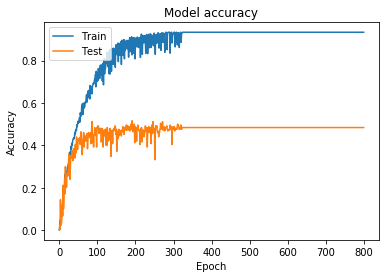

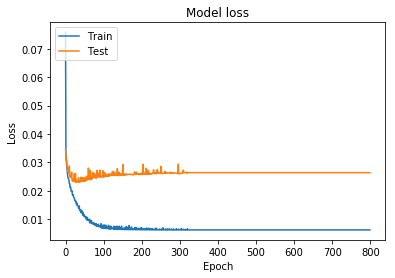

[[0.         0.         0.         ... 0.         0.01355688 0.        ]
 [0.         0.0519842  0.         ... 0.16233471 0.04743312 0.        ]
 [0.         0.2836171  0.         ... 0.1276612  0.         0.        ]
 ...
 [0.01869885 0.         0.01238183 ... 0.14880095 0.25377068 0.        ]
 [0.         0.         0.         ... 0.1871195  0.         0.20338891]
 [0.0185074  0.         0.05953021 ... 0.03914554 0.09492901 0.        ]]


In [6]:
# No hiden layer. just fully connected
# sigmoid as activation function
model = Sequential([
    Dense(1536, input_dim=1536),
    Activation('relu'), 
    Dense(1536),
    Activation('relu'), 
    Dense(1536),
    Activation('relu'),  
    Dense(1536),
    Activation('hard_sigmoid'),  # ,sigmoid softmax
    #Dense(247),
    #Activation('relu'),
    #Dense(2470),
    #Activation('sigmoid')
])

# optimizer

rmsprop = RMSprop(lr=0.0005, rho=0.9, epsilon=1e-8, decay=0.0)


def mean_pred(y_true, y_pred):
    return K.mean(y_pred)


model.compile(
    optimizer=rmsprop,
    loss='mean_squared_error',
    metrics=['accuracy']  # , mean_pred]
)
print('Train-------------------------')

history = model.fit(X_train, y_train, validation_split=0.25, epochs=800, shuffle = True, batch_size=75, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])
layer_output1 = get_3rd_layer_output([X_train])[0]

print(layer_output1)

Train-------------------------
Train on 750 samples, validate on 250 samples
Epoch 1/400
750/750 [==============================] - 1s 760us/step - loss: 0.0681 - acc: 0.0227 - val_loss: 0.0443 - val_acc: 0.0160
Epoch 2/400
750/750 [==============================] - 0s 295us/step - loss: 0.0427 - acc: 0.0133 - val_loss: 0.0427 - val_acc: 0.0160
Epoch 3/400
750/750 [==============================] - 0s 295us/step - loss: 0.0417 - acc: 0.0133 - val_loss: 0.0420 - val_acc: 0.0000e+00
Epoch 4/400
750/750 [==============================] - 0s 294us/step - loss: 0.0406 - acc: 0.0000e+00 - val_loss: 0.0410 - val_acc: 0.0000e+00
Epoch 5/400
750/750 [==============================] - 0s 293us/step - loss: 0.0403 - acc: 0.0000e+00 - val_loss: 0.0410 - val_acc: 0.0000e+00
Epoch 6/400
750/750 [==============================] - 0s 293us/step - loss: 0.0401 - acc: 0.0000e+00 - val_loss: 0.0404 - val_acc: 0.0000e+00
Epoch 7/400
750/750 [==============================] - 0s 294us/step - loss: 0.0394 -

750/750 [==============================] - 0s 291us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 60/400
750/750 [==============================] - 0s 291us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 61/400
750/750 [==============================] - 0s 290us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 62/400
750/750 [==============================] - 0s 309us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 63/400
750/750 [==============================] - 0s 295us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 64/400
750/750 [==============================] - 0s 315us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 65/400
750/750 [==============================] - 0s 315us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 66/400
750/750 [===========

750/750 [==============================] - 0s 293us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 118/400
750/750 [==============================] - 0s 291us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 119/400
750/750 [==============================] - 0s 290us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 120/400
750/750 [==============================] - 0s 290us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 121/400
750/750 [==============================] - 0s 289us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 122/400
750/750 [==============================] - 0s 290us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 123/400
750/750 [==============================] - 0s 289us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 124/400
750/750 [====

750/750 [==============================] - 0s 292us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 176/400
750/750 [==============================] - 0s 300us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 177/400
750/750 [==============================] - 0s 297us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 178/400
750/750 [==============================] - 0s 299us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 179/400
750/750 [==============================] - 0s 298us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 180/400
750/750 [==============================] - 0s 300us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 181/400
750/750 [==============================] - 0s 296us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 182/400
750/750 [====

750/750 [==============================] - 0s 293us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 234/400
750/750 [==============================] - 0s 290us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 235/400
750/750 [==============================] - 0s 289us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 236/400
750/750 [==============================] - 0s 289us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 237/400
750/750 [==============================] - 0s 289us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 238/400
750/750 [==============================] - 0s 289us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 239/400
750/750 [==============================] - 0s 289us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 240/400
750/750 [====

750/750 [==============================] - 0s 291us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 292/400
750/750 [==============================] - 0s 289us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 293/400
750/750 [==============================] - 0s 289us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 294/400
750/750 [==============================] - 0s 290us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 295/400
750/750 [==============================] - 0s 289us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 296/400
750/750 [==============================] - 0s 289us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 297/400
750/750 [==============================] - 0s 304us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 298/400
750/750 [====

750/750 [==============================] - 0s 289us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 350/400
750/750 [==============================] - 0s 290us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 351/400
750/750 [==============================] - 0s 292us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 352/400
750/750 [==============================] - 0s 290us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 353/400
750/750 [==============================] - 0s 291us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 354/400
750/750 [==============================] - 0s 291us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 355/400
750/750 [==============================] - 0s 292us/step - loss: 0.0394 - acc: 0.0027 - val_loss: 0.0403 - val_acc: 0.0000e+00
Epoch 356/400
750/750 [====

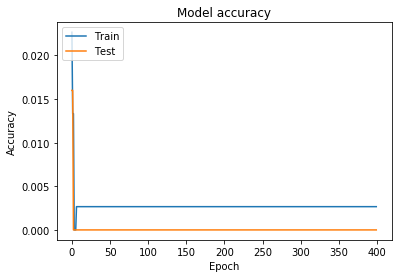

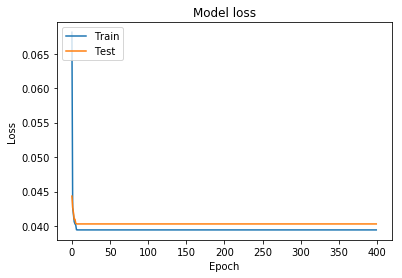

[[0.         0.00101273 0.         ... 0.         0.48881918 0.        ]
 [0.01633934 0.         0.         ... 0.         0.20645763 0.        ]
 [0.         0.         0.         ... 0.         0.3425481  0.        ]
 ...
 [0.         0.         0.         ... 0.         0.2184124  0.        ]
 [0.         0.         0.         ... 0.         0.58032125 0.        ]
 [0.         0.         0.         ... 0.         0.06509323 0.        ]]


In [7]:
# No hiden layer. just fully connected
# sigmoid as activation function
model = Sequential([
    Dense(1536, input_dim=1536),
    Activation('relu'), 
    Dense(1536),
    Activation('relu'), 
    Dense(1536),
    Activation('relu'),  
    Dense(1536),
    Activation('hard_sigmoid'),  # ,sigmoid softmax
    #Dense(247),
    #Activation('relu'),
    #Dense(2470),
    #Activation('sigmoid')
])

# optimizer

rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-8, decay=0.0)


def mean_pred(y_true, y_pred):
    return K.mean(y_pred)


model.compile(
    optimizer=rmsprop,
    loss='mean_squared_error',
    metrics=['accuracy']  # , mean_pred]
)
print('Train-------------------------')

history = model.fit(X_train, y_train, validation_split=0.25, epochs=400, shuffle = True, batch_size=75, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])
layer_output1 = get_3rd_layer_output([X_train])[0]

print(layer_output1)

Train-------------------------
Train on 750 samples, validate on 250 samples
Epoch 1/3000
750/750 [==============================] - 1s 671us/step - loss: 0.2001 - acc: 0.0000e+00 - val_loss: 0.1145 - val_acc: 0.0000e+00
Epoch 2/3000
750/750 [==============================] - 0s 256us/step - loss: 0.0713 - acc: 0.0000e+00 - val_loss: 0.0490 - val_acc: 0.0040
Epoch 3/3000
750/750 [==============================] - 0s 245us/step - loss: 0.0407 - acc: 0.0067 - val_loss: 0.0390 - val_acc: 0.0160
Epoch 4/3000
750/750 [==============================] - 0s 234us/step - loss: 0.0356 - acc: 0.0120 - val_loss: 0.0364 - val_acc: 0.0600
Epoch 5/3000
750/750 [==============================] - 0s 230us/step - loss: 0.0341 - acc: 0.0240 - val_loss: 0.0351 - val_acc: 0.0000e+00
Epoch 6/3000
750/750 [==============================] - 0s 241us/step - loss: 0.0332 - acc: 0.0133 - val_loss: 0.0343 - val_acc: 0.0560
Epoch 7/3000
750/750 [==============================] - 0s 244us/step - loss: 0.0325 - acc:

750/750 [==============================] - 0s 223us/step - loss: 0.0228 - acc: 0.1693 - val_loss: 0.0256 - val_acc: 0.1720
Epoch 61/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0227 - acc: 0.1720 - val_loss: 0.0256 - val_acc: 0.1480
Epoch 62/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0227 - acc: 0.1827 - val_loss: 0.0257 - val_acc: 0.1520
Epoch 63/3000
750/750 [==============================] - 0s 226us/step - loss: 0.0227 - acc: 0.1813 - val_loss: 0.0256 - val_acc: 0.1800
Epoch 64/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0226 - acc: 0.1933 - val_loss: 0.0255 - val_acc: 0.1560
Epoch 65/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0226 - acc: 0.1827 - val_loss: 0.0255 - val_acc: 0.1600
Epoch 66/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0225 - acc: 0.1907 - val_loss: 0.0255 - val_acc: 0.1800
Epoch 67/3000
750/750 [==============================] 

Epoch 120/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0211 - acc: 0.2907 - val_loss: 0.0252 - val_acc: 0.2320
Epoch 121/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0211 - acc: 0.3040 - val_loss: 0.0252 - val_acc: 0.2400
Epoch 122/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0211 - acc: 0.2853 - val_loss: 0.0253 - val_acc: 0.2360
Epoch 123/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0211 - acc: 0.2973 - val_loss: 0.0254 - val_acc: 0.2440
Epoch 124/3000
750/750 [==============================] - 0s 225us/step - loss: 0.0210 - acc: 0.2893 - val_loss: 0.0252 - val_acc: 0.2360
Epoch 125/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0209 - acc: 0.3000 - val_loss: 0.0257 - val_acc: 0.2360
Epoch 126/3000
750/750 [==============================] - 0s 225us/step - loss: 0.0211 - acc: 0.3013 - val_loss: 0.0254 - val_acc: 0.2320
Epoch 127/3000
750/750 [==========

750/750 [==============================] - 0s 223us/step - loss: 0.0201 - acc: 0.3893 - val_loss: 0.0252 - val_acc: 0.2760
Epoch 180/3000
750/750 [==============================] - 0s 225us/step - loss: 0.0201 - acc: 0.4027 - val_loss: 0.0252 - val_acc: 0.2880
Epoch 181/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0201 - acc: 0.3693 - val_loss: 0.0254 - val_acc: 0.3000
Epoch 182/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0201 - acc: 0.3800 - val_loss: 0.0252 - val_acc: 0.2920
Epoch 183/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0200 - acc: 0.3987 - val_loss: 0.0254 - val_acc: 0.3080
Epoch 184/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0201 - acc: 0.3853 - val_loss: 0.0257 - val_acc: 0.3120
Epoch 185/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0200 - acc: 0.4000 - val_loss: 0.0253 - val_acc: 0.3120
Epoch 186/3000
750/750 [=========================

750/750 [==============================] - 0s 222us/step - loss: 0.0194 - acc: 0.4467 - val_loss: 0.0253 - val_acc: 0.3240
Epoch 239/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0194 - acc: 0.4600 - val_loss: 0.0254 - val_acc: 0.3040
Epoch 240/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0194 - acc: 0.4440 - val_loss: 0.0252 - val_acc: 0.3200
Epoch 241/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0193 - acc: 0.4547 - val_loss: 0.0257 - val_acc: 0.3000
Epoch 242/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0195 - acc: 0.4507 - val_loss: 0.0252 - val_acc: 0.3120
Epoch 243/3000
750/750 [==============================] - 0s 225us/step - loss: 0.0193 - acc: 0.4573 - val_loss: 0.0256 - val_acc: 0.3040
Epoch 244/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0193 - acc: 0.4587 - val_loss: 0.0252 - val_acc: 0.3120
Epoch 245/3000
750/750 [=========================

750/750 [==============================] - 0s 222us/step - loss: 0.0188 - acc: 0.4853 - val_loss: 0.0255 - val_acc: 0.3400
Epoch 298/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0190 - acc: 0.4960 - val_loss: 0.0253 - val_acc: 0.3440
Epoch 299/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0188 - acc: 0.4933 - val_loss: 0.0255 - val_acc: 0.3520
Epoch 300/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0189 - acc: 0.4800 - val_loss: 0.0253 - val_acc: 0.3600
Epoch 301/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0188 - acc: 0.4840 - val_loss: 0.0255 - val_acc: 0.3520
Epoch 302/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0189 - acc: 0.4947 - val_loss: 0.0252 - val_acc: 0.3280
Epoch 303/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0187 - acc: 0.4987 - val_loss: 0.0254 - val_acc: 0.3280
Epoch 304/3000
750/750 [=========================

750/750 [==============================] - 0s 221us/step - loss: 0.0183 - acc: 0.5360 - val_loss: 0.0254 - val_acc: 0.3640
Epoch 357/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0185 - acc: 0.5307 - val_loss: 0.0254 - val_acc: 0.3560
Epoch 358/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0183 - acc: 0.5267 - val_loss: 0.0254 - val_acc: 0.3680
Epoch 359/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0186 - acc: 0.5427 - val_loss: 0.0254 - val_acc: 0.3560
Epoch 360/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0183 - acc: 0.5413 - val_loss: 0.0254 - val_acc: 0.3400
Epoch 361/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0184 - acc: 0.5307 - val_loss: 0.0266 - val_acc: 0.3840
Epoch 362/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0184 - acc: 0.5480 - val_loss: 0.0254 - val_acc: 0.3640
Epoch 363/3000
750/750 [=========================

750/750 [==============================] - 0s 222us/step - loss: 0.0182 - acc: 0.5547 - val_loss: 0.0254 - val_acc: 0.3680
Epoch 416/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0180 - acc: 0.5760 - val_loss: 0.0259 - val_acc: 0.3480
Epoch 417/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0181 - acc: 0.5693 - val_loss: 0.0254 - val_acc: 0.3640
Epoch 418/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0181 - acc: 0.5827 - val_loss: 0.0254 - val_acc: 0.3800
Epoch 419/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0180 - acc: 0.5827 - val_loss: 0.0256 - val_acc: 0.3720
Epoch 420/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0182 - acc: 0.5720 - val_loss: 0.0254 - val_acc: 0.3640
Epoch 421/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0181 - acc: 0.5667 - val_loss: 0.0258 - val_acc: 0.3640
Epoch 422/3000
750/750 [=========================

750/750 [==============================] - 0s 220us/step - loss: 0.0180 - acc: 0.6027 - val_loss: 0.0259 - val_acc: 0.3840
Epoch 475/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0178 - acc: 0.6133 - val_loss: 0.0256 - val_acc: 0.3800
Epoch 476/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0178 - acc: 0.6080 - val_loss: 0.0259 - val_acc: 0.3800
Epoch 477/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0178 - acc: 0.6107 - val_loss: 0.0255 - val_acc: 0.3960
Epoch 478/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0180 - acc: 0.6040 - val_loss: 0.0255 - val_acc: 0.4080
Epoch 479/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0177 - acc: 0.6120 - val_loss: 0.0255 - val_acc: 0.3880
Epoch 480/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0178 - acc: 0.6013 - val_loss: 0.0255 - val_acc: 0.3880
Epoch 481/3000
750/750 [=========================

750/750 [==============================] - 0s 226us/step - loss: 0.0175 - acc: 0.6400 - val_loss: 0.0257 - val_acc: 0.3920
Epoch 534/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0177 - acc: 0.6373 - val_loss: 0.0257 - val_acc: 0.4160
Epoch 535/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0175 - acc: 0.6400 - val_loss: 0.0258 - val_acc: 0.4200
Epoch 536/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0178 - acc: 0.6200 - val_loss: 0.0256 - val_acc: 0.4200
Epoch 537/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0175 - acc: 0.6387 - val_loss: 0.0257 - val_acc: 0.4160
Epoch 538/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0178 - acc: 0.6333 - val_loss: 0.0261 - val_acc: 0.3920
Epoch 539/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0175 - acc: 0.6453 - val_loss: 0.0257 - val_acc: 0.4080
Epoch 540/3000
750/750 [=========================

750/750 [==============================] - 0s 224us/step - loss: 0.0175 - acc: 0.6773 - val_loss: 0.0259 - val_acc: 0.4120
Epoch 593/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0174 - acc: 0.6720 - val_loss: 0.0258 - val_acc: 0.4040
Epoch 594/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0175 - acc: 0.6787 - val_loss: 0.0259 - val_acc: 0.4040
Epoch 595/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0174 - acc: 0.6653 - val_loss: 0.0258 - val_acc: 0.4160
Epoch 596/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0174 - acc: 0.6707 - val_loss: 0.0261 - val_acc: 0.4000
Epoch 597/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0176 - acc: 0.6707 - val_loss: 0.0258 - val_acc: 0.4200
Epoch 598/3000
750/750 [==============================] - 0s 225us/step - loss: 0.0173 - acc: 0.6893 - val_loss: 0.0259 - val_acc: 0.4000
Epoch 599/3000
750/750 [=========================

750/750 [==============================] - 0s 227us/step - loss: 0.0172 - acc: 0.7013 - val_loss: 0.0259 - val_acc: 0.4200
Epoch 652/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0175 - acc: 0.6787 - val_loss: 0.0264 - val_acc: 0.4000
Epoch 653/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0173 - acc: 0.7253 - val_loss: 0.0259 - val_acc: 0.4160
Epoch 654/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0172 - acc: 0.7147 - val_loss: 0.0259 - val_acc: 0.4160
Epoch 655/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0175 - acc: 0.7093 - val_loss: 0.0259 - val_acc: 0.4200
Epoch 656/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0172 - acc: 0.7147 - val_loss: 0.0259 - val_acc: 0.4120
Epoch 657/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0173 - acc: 0.7107 - val_loss: 0.0266 - val_acc: 0.3880
Epoch 658/3000
750/750 [=========================

750/750 [==============================] - 0s 223us/step - loss: 0.0172 - acc: 0.7293 - val_loss: 0.0260 - val_acc: 0.4240
Epoch 711/3000
750/750 [==============================] - 0s 225us/step - loss: 0.0174 - acc: 0.7147 - val_loss: 0.0260 - val_acc: 0.4160
Epoch 712/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0172 - acc: 0.7440 - val_loss: 0.0261 - val_acc: 0.4120
Epoch 713/3000
750/750 [==============================] - 0s 226us/step - loss: 0.0173 - acc: 0.7307 - val_loss: 0.0273 - val_acc: 0.3840
Epoch 714/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0173 - acc: 0.7213 - val_loss: 0.0260 - val_acc: 0.4200
Epoch 715/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0171 - acc: 0.7387 - val_loss: 0.0260 - val_acc: 0.4160
Epoch 716/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0174 - acc: 0.7013 - val_loss: 0.0260 - val_acc: 0.4160
Epoch 717/3000
750/750 [=========================

750/750 [==============================] - 0s 222us/step - loss: 0.0171 - acc: 0.7627 - val_loss: 0.0264 - val_acc: 0.4240
Epoch 770/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0172 - acc: 0.7253 - val_loss: 0.0261 - val_acc: 0.4160
Epoch 771/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0171 - acc: 0.7613 - val_loss: 0.0261 - val_acc: 0.4080
Epoch 772/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0174 - acc: 0.7253 - val_loss: 0.0260 - val_acc: 0.4160
Epoch 773/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0171 - acc: 0.7533 - val_loss: 0.0260 - val_acc: 0.4200
Epoch 774/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0171 - acc: 0.7707 - val_loss: 0.0261 - val_acc: 0.4120
Epoch 775/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0171 - acc: 0.7680 - val_loss: 0.0261 - val_acc: 0.4120
Epoch 776/3000
750/750 [=========================

750/750 [==============================] - 0s 224us/step - loss: 0.0172 - acc: 0.7693 - val_loss: 0.0273 - val_acc: 0.3880
Epoch 829/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0171 - acc: 0.7693 - val_loss: 0.0262 - val_acc: 0.4160
Epoch 830/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0170 - acc: 0.7907 - val_loss: 0.0262 - val_acc: 0.4160
Epoch 831/3000
750/750 [==============================] - 0s 225us/step - loss: 0.0171 - acc: 0.7693 - val_loss: 0.0266 - val_acc: 0.4240
Epoch 832/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0171 - acc: 0.7773 - val_loss: 0.0262 - val_acc: 0.4280
Epoch 833/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0170 - acc: 0.7773 - val_loss: 0.0262 - val_acc: 0.3960
Epoch 834/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0173 - acc: 0.7627 - val_loss: 0.0262 - val_acc: 0.4040
Epoch 835/3000
750/750 [=========================

750/750 [==============================] - 0s 223us/step - loss: 0.0170 - acc: 0.8040 - val_loss: 0.0262 - val_acc: 0.4040
Epoch 888/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0171 - acc: 0.7773 - val_loss: 0.0275 - val_acc: 0.4000
Epoch 889/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0171 - acc: 0.7907 - val_loss: 0.0263 - val_acc: 0.4120
Epoch 890/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0170 - acc: 0.8093 - val_loss: 0.0262 - val_acc: 0.4040
Epoch 891/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0170 - acc: 0.8080 - val_loss: 0.0262 - val_acc: 0.4240
Epoch 892/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0172 - acc: 0.7693 - val_loss: 0.0262 - val_acc: 0.3960
Epoch 893/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0170 - acc: 0.7973 - val_loss: 0.0263 - val_acc: 0.4120
Epoch 894/3000
750/750 [=========================

750/750 [==============================] - 0s 222us/step - loss: 0.0170 - acc: 0.8187 - val_loss: 0.0263 - val_acc: 0.4240
Epoch 947/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0170 - acc: 0.8173 - val_loss: 0.0263 - val_acc: 0.4240
Epoch 948/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0170 - acc: 0.8147 - val_loss: 0.0272 - val_acc: 0.3960
Epoch 949/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0172 - acc: 0.7960 - val_loss: 0.0263 - val_acc: 0.4160
Epoch 950/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0170 - acc: 0.8147 - val_loss: 0.0263 - val_acc: 0.4280
Epoch 951/3000
750/750 [==============================] - 0s 225us/step - loss: 0.0170 - acc: 0.8227 - val_loss: 0.0263 - val_acc: 0.4080
Epoch 952/3000
750/750 [==============================] - 0s 227us/step - loss: 0.0172 - acc: 0.7720 - val_loss: 0.0263 - val_acc: 0.4160
Epoch 953/3000
750/750 [=========================

750/750 [==============================] - 0s 222us/step - loss: 0.0172 - acc: 0.7813 - val_loss: 0.0263 - val_acc: 0.4240
Epoch 1006/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0170 - acc: 0.8373 - val_loss: 0.0263 - val_acc: 0.4240
Epoch 1007/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0170 - acc: 0.8467 - val_loss: 0.0263 - val_acc: 0.4160
Epoch 1008/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0170 - acc: 0.8427 - val_loss: 0.0263 - val_acc: 0.4240
Epoch 1009/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0172 - acc: 0.7987 - val_loss: 0.0263 - val_acc: 0.4280
Epoch 1010/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0170 - acc: 0.8347 - val_loss: 0.0263 - val_acc: 0.4320
Epoch 1011/3000
750/750 [==============================] - 0s 233us/step - loss: 0.0170 - acc: 0.8427 - val_loss: 0.0264 - val_acc: 0.4160
Epoch 1012/3000
750/750 [==================

750/750 [==============================] - 0s 223us/step - loss: 0.0170 - acc: 0.8440 - val_loss: 0.0270 - val_acc: 0.4240
Epoch 1065/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0171 - acc: 0.8267 - val_loss: 0.0264 - val_acc: 0.4320
Epoch 1066/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0170 - acc: 0.8453 - val_loss: 0.0263 - val_acc: 0.4320
Epoch 1067/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0170 - acc: 0.8547 - val_loss: 0.0264 - val_acc: 0.4280
Epoch 1068/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0170 - acc: 0.8547 - val_loss: 0.0264 - val_acc: 0.4400
Epoch 1069/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0172 - acc: 0.8147 - val_loss: 0.0264 - val_acc: 0.4160
Epoch 1070/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0170 - acc: 0.8427 - val_loss: 0.0263 - val_acc: 0.4240
Epoch 1071/3000
750/750 [==================

750/750 [==============================] - 0s 222us/step - loss: 0.0170 - acc: 0.8720 - val_loss: 0.0264 - val_acc: 0.4280
Epoch 1124/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0170 - acc: 0.8560 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 1125/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0171 - acc: 0.8200 - val_loss: 0.0264 - val_acc: 0.4240
Epoch 1126/3000
750/750 [==============================] - 0s 231us/step - loss: 0.0170 - acc: 0.8840 - val_loss: 0.0264 - val_acc: 0.4240
Epoch 1127/3000
750/750 [==============================] - 0s 254us/step - loss: 0.0170 - acc: 0.8720 - val_loss: 0.0264 - val_acc: 0.4280
Epoch 1128/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0170 - acc: 0.8693 - val_loss: 0.0264 - val_acc: 0.4360
Epoch 1129/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0172 - acc: 0.8053 - val_loss: 0.0264 - val_acc: 0.4280
Epoch 1130/3000
750/750 [==================

750/750 [==============================] - 0s 222us/step - loss: 0.0170 - acc: 0.8760 - val_loss: 0.0264 - val_acc: 0.4400
Epoch 1183/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0170 - acc: 0.8773 - val_loss: 0.0269 - val_acc: 0.4320
Epoch 1184/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0172 - acc: 0.8160 - val_loss: 0.0264 - val_acc: 0.4360
Epoch 1185/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0170 - acc: 0.8720 - val_loss: 0.0264 - val_acc: 0.4360
Epoch 1186/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0170 - acc: 0.8840 - val_loss: 0.0264 - val_acc: 0.4280
Epoch 1187/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0170 - acc: 0.8827 - val_loss: 0.0264 - val_acc: 0.4240
Epoch 1188/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0170 - acc: 0.8787 - val_loss: 0.0264 - val_acc: 0.4360
Epoch 1189/3000
750/750 [==================

750/750 [==============================] - 0s 223us/step - loss: 0.0170 - acc: 0.8827 - val_loss: 0.0264 - val_acc: 0.4320
Epoch 1242/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0170 - acc: 0.8840 - val_loss: 0.0264 - val_acc: 0.4280
Epoch 1243/3000
750/750 [==============================] - 0s 225us/step - loss: 0.0170 - acc: 0.8760 - val_loss: 0.0264 - val_acc: 0.4280
Epoch 1244/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0170 - acc: 0.8707 - val_loss: 0.0266 - val_acc: 0.4440
Epoch 1245/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0171 - acc: 0.8320 - val_loss: 0.0264 - val_acc: 0.4240
Epoch 1246/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0170 - acc: 0.8813 - val_loss: 0.0264 - val_acc: 0.4200
Epoch 1247/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0170 - acc: 0.8787 - val_loss: 0.0264 - val_acc: 0.4160
Epoch 1248/3000
750/750 [==================

750/750 [==============================] - 0s 223us/step - loss: 0.0170 - acc: 0.8973 - val_loss: 0.0264 - val_acc: 0.4240
Epoch 1301/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0170 - acc: 0.8893 - val_loss: 0.0268 - val_acc: 0.4320
Epoch 1302/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0171 - acc: 0.8227 - val_loss: 0.0264 - val_acc: 0.4360
Epoch 1303/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0170 - acc: 0.8827 - val_loss: 0.0264 - val_acc: 0.4360
Epoch 1304/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0170 - acc: 0.8920 - val_loss: 0.0264 - val_acc: 0.4440
Epoch 1305/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0170 - acc: 0.8973 - val_loss: 0.0265 - val_acc: 0.4360
Epoch 1306/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0170 - acc: 0.8933 - val_loss: 0.0265 - val_acc: 0.4160
Epoch 1307/3000
750/750 [==================

750/750 [==============================] - 0s 224us/step - loss: 0.0170 - acc: 0.8947 - val_loss: 0.0264 - val_acc: 0.4360
Epoch 1360/3000
750/750 [==============================] - 0s 225us/step - loss: 0.0170 - acc: 0.8920 - val_loss: 0.0264 - val_acc: 0.4240
Epoch 1361/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0171 - acc: 0.8507 - val_loss: 0.0265 - val_acc: 0.4320
Epoch 1362/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0170 - acc: 0.8867 - val_loss: 0.0264 - val_acc: 0.4320
Epoch 1363/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0170 - acc: 0.8933 - val_loss: 0.0264 - val_acc: 0.4400
Epoch 1364/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0170 - acc: 0.8973 - val_loss: 0.0264 - val_acc: 0.4400
Epoch 1365/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0170 - acc: 0.9013 - val_loss: 0.0264 - val_acc: 0.4240
Epoch 1366/3000
750/750 [==================

750/750 [==============================] - 0s 223us/step - loss: 0.0171 - acc: 0.8467 - val_loss: 0.0265 - val_acc: 0.4440
Epoch 1419/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0170 - acc: 0.8880 - val_loss: 0.0264 - val_acc: 0.4480
Epoch 1420/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.8987 - val_loss: 0.0264 - val_acc: 0.4440
Epoch 1421/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.8973 - val_loss: 0.0264 - val_acc: 0.4360
Epoch 1422/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.8973 - val_loss: 0.0265 - val_acc: 0.4480
Epoch 1423/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0170 - acc: 0.8987 - val_loss: 0.0264 - val_acc: 0.4520
Epoch 1424/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0170 - acc: 0.9000 - val_loss: 0.0265 - val_acc: 0.4480
Epoch 1425/3000
750/750 [==================

750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9000 - val_loss: 0.0265 - val_acc: 0.4320
Epoch 1478/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0169 - acc: 0.9013 - val_loss: 0.0265 - val_acc: 0.4480
Epoch 1479/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0171 - acc: 0.8507 - val_loss: 0.0264 - val_acc: 0.4400
Epoch 1480/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9013 - val_loss: 0.0264 - val_acc: 0.4400
Epoch 1481/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9053 - val_loss: 0.0264 - val_acc: 0.4480
Epoch 1482/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9093 - val_loss: 0.0265 - val_acc: 0.4440
Epoch 1483/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9053 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 1484/3000
750/750 [==================

750/750 [==============================] - 0s 225us/step - loss: 0.0169 - acc: 0.9093 - val_loss: 0.0265 - val_acc: 0.4440
Epoch 1537/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9133 - val_loss: 0.0265 - val_acc: 0.4440
Epoch 1538/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0171 - acc: 0.8507 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 1539/3000
750/750 [==============================] - 0s 237us/step - loss: 0.0169 - acc: 0.8947 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 1540/3000
750/750 [==============================] - 0s 225us/step - loss: 0.0169 - acc: 0.9133 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 1541/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9107 - val_loss: 0.0265 - val_acc: 0.4320
Epoch 1542/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9093 - val_loss: 0.0265 - val_acc: 0.4360
Epoch 1543/3000
750/750 [==================

750/750 [==============================] - 0s 223us/step - loss: 0.0171 - acc: 0.8533 - val_loss: 0.0264 - val_acc: 0.4400
Epoch 1596/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9040 - val_loss: 0.0264 - val_acc: 0.4360
Epoch 1597/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9107 - val_loss: 0.0264 - val_acc: 0.4360
Epoch 1598/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9120 - val_loss: 0.0264 - val_acc: 0.4360
Epoch 1599/3000
750/750 [==============================] - 0s 241us/step - loss: 0.0169 - acc: 0.9133 - val_loss: 0.0264 - val_acc: 0.4440
Epoch 1600/3000
750/750 [==============================] - 0s 234us/step - loss: 0.0169 - acc: 0.9120 - val_loss: 0.0264 - val_acc: 0.4360
Epoch 1601/3000
750/750 [==============================] - 0s 228us/step - loss: 0.0169 - acc: 0.9120 - val_loss: 0.0264 - val_acc: 0.4400
Epoch 1602/3000
750/750 [==================

750/750 [==============================] - 0s 223us/step - loss: 0.0171 - acc: 0.8667 - val_loss: 0.0272 - val_acc: 0.4360
Epoch 1655/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0170 - acc: 0.9000 - val_loss: 0.0265 - val_acc: 0.4280
Epoch 1656/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9027 - val_loss: 0.0265 - val_acc: 0.4320
Epoch 1657/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9053 - val_loss: 0.0265 - val_acc: 0.4480
Epoch 1658/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9093 - val_loss: 0.0265 - val_acc: 0.4320
Epoch 1659/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0169 - acc: 0.9067 - val_loss: 0.0265 - val_acc: 0.4440
Epoch 1660/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0169 - acc: 0.9133 - val_loss: 0.0265 - val_acc: 0.4360
Epoch 1661/3000
750/750 [==================

750/750 [==============================] - 0s 225us/step - loss: 0.0169 - acc: 0.9093 - val_loss: 0.0271 - val_acc: 0.4400
Epoch 1714/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0171 - acc: 0.8720 - val_loss: 0.0265 - val_acc: 0.4320
Epoch 1715/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9120 - val_loss: 0.0265 - val_acc: 0.4360
Epoch 1716/3000
750/750 [==============================] - 0s 226us/step - loss: 0.0169 - acc: 0.9133 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 1717/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0169 - acc: 0.9120 - val_loss: 0.0265 - val_acc: 0.4360
Epoch 1718/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9120 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 1719/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9120 - val_loss: 0.0265 - val_acc: 0.4360
Epoch 1720/3000
750/750 [==================

750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9160 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 1773/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0171 - acc: 0.8667 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 1774/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9053 - val_loss: 0.0265 - val_acc: 0.4440
Epoch 1775/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9133 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 1776/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9147 - val_loss: 0.0265 - val_acc: 0.4440
Epoch 1777/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9133 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 1778/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0169 - acc: 0.9173 - val_loss: 0.0265 - val_acc: 0.4480
Epoch 1779/3000
750/750 [==================

750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9133 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 1832/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9200 - val_loss: 0.0265 - val_acc: 0.4560
Epoch 1833/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9147 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 1834/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9173 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 1835/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9120 - val_loss: 0.0265 - val_acc: 0.4600
Epoch 1836/3000
750/750 [==============================] - 0s 225us/step - loss: 0.0170 - acc: 0.8387 - val_loss: 0.0265 - val_acc: 0.4480
Epoch 1837/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9053 - val_loss: 0.0265 - val_acc: 0.4440
Epoch 1838/3000
750/750 [==================

750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9080 - val_loss: 0.0265 - val_acc: 0.4320
Epoch 1891/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0171 - acc: 0.8587 - val_loss: 0.0266 - val_acc: 0.4520
Epoch 1892/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9067 - val_loss: 0.0265 - val_acc: 0.4360
Epoch 1893/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9147 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 1894/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0169 - acc: 0.9173 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 1895/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9173 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 1896/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9213 - val_loss: 0.0265 - val_acc: 0.4440
Epoch 1897/3000
750/750 [==================

750/750 [==============================] - 0s 222us/step - loss: 0.0171 - acc: 0.8467 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 1950/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9053 - val_loss: 0.0265 - val_acc: 0.4360
Epoch 1951/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9107 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 1952/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9187 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 1953/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9173 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 1954/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9187 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 1955/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9200 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 1956/3000
750/750 [==================

750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9093 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 2009/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9147 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 2010/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9173 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 2011/3000
750/750 [==============================] - 0s 226us/step - loss: 0.0169 - acc: 0.9160 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 2012/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9147 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 2013/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9200 - val_loss: 0.0265 - val_acc: 0.4360
Epoch 2014/3000
750/750 [==============================] - 0s 225us/step - loss: 0.0169 - acc: 0.9133 - val_loss: 0.0265 - val_acc: 0.4320
Epoch 2015/3000
750/750 [==================

750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9187 - val_loss: 0.0265 - val_acc: 0.4360
Epoch 2068/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9200 - val_loss: 0.0265 - val_acc: 0.4320
Epoch 2069/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9133 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2070/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0170 - acc: 0.8613 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 2071/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9187 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 2072/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 2073/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9213 - val_loss: 0.0265 - val_acc: 0.4360
Epoch 2074/3000
750/750 [==================

750/750 [==============================] - 0s 225us/step - loss: 0.0169 - acc: 0.9200 - val_loss: 0.0265 - val_acc: 0.4480
Epoch 2127/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9213 - val_loss: 0.0265 - val_acc: 0.4480
Epoch 2128/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9213 - val_loss: 0.0265 - val_acc: 0.4480
Epoch 2129/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4480
Epoch 2130/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4480
Epoch 2131/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0171 - acc: 0.8853 - val_loss: 0.0265 - val_acc: 0.4440
Epoch 2132/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9040 - val_loss: 0.0265 - val_acc: 0.4440
Epoch 2133/3000
750/750 [==================

750/750 [==============================] - 0s 225us/step - loss: 0.0169 - acc: 0.9213 - val_loss: 0.0265 - val_acc: 0.4440
Epoch 2186/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0170 - acc: 0.8720 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2187/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9133 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2188/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9173 - val_loss: 0.0265 - val_acc: 0.4560
Epoch 2189/3000
750/750 [==============================] - 0s 226us/step - loss: 0.0169 - acc: 0.9200 - val_loss: 0.0265 - val_acc: 0.4560
Epoch 2190/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9187 - val_loss: 0.0265 - val_acc: 0.4560
Epoch 2191/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9213 - val_loss: 0.0265 - val_acc: 0.4480
Epoch 2192/3000
750/750 [==================

750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9173 - val_loss: 0.0265 - val_acc: 0.4360
Epoch 2245/3000
750/750 [==============================] - 0s 225us/step - loss: 0.0169 - acc: 0.9200 - val_loss: 0.0265 - val_acc: 0.4360
Epoch 2246/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4360
Epoch 2247/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9213 - val_loss: 0.0265 - val_acc: 0.4360
Epoch 2248/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9200 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 2249/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0170 - acc: 0.8733 - val_loss: 0.0265 - val_acc: 0.4360
Epoch 2250/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9173 - val_loss: 0.0265 - val_acc: 0.4360
Epoch 2251/3000
750/750 [==================

750/750 [==============================] - 0s 225us/step - loss: 0.0169 - acc: 0.9213 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2304/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9213 - val_loss: 0.0265 - val_acc: 0.4480
Epoch 2305/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4440
Epoch 2306/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4400
Epoch 2307/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0266 - val_acc: 0.4360
Epoch 2308/3000
750/750 [==============================] - 0s 226us/step - loss: 0.0170 - acc: 0.8867 - val_loss: 0.0265 - val_acc: 0.4600
Epoch 2309/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9133 - val_loss: 0.0265 - val_acc: 0.4560
Epoch 2310/3000
750/750 [==================

750/750 [==============================] - 0s 224us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2363/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2364/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2365/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2366/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2367/3000
750/750 [==============================] - 0s 233us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2368/3000
750/750 [==============================] - 0s 235us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2369/3000
750/750 [==================

750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2422/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2423/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2424/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2425/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2426/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2427/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2428/3000
750/750 [==================

750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2481/3000
750/750 [==============================] - 0s 220us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2482/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2483/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2484/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2485/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2486/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2487/3000
750/750 [==================

750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2540/3000
750/750 [==============================] - 0s 228us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2541/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2542/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2543/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2544/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2545/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2546/3000
750/750 [==================

750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2599/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2600/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2601/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2602/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2603/3000
750/750 [==============================] - 0s 225us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2604/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2605/3000
750/750 [==================

750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2658/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2659/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2660/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2661/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2662/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2663/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2664/3000
750/750 [==================

750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2717/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2718/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2719/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2720/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2721/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2722/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2723/3000
750/750 [==================

750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2776/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2777/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2778/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2779/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2780/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2781/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2782/3000
750/750 [==================

750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2835/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2836/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2837/3000
750/750 [==============================] - 0s 225us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2838/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2839/3000
750/750 [==============================] - 0s 223us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2840/3000
750/750 [==============================] - 0s 225us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2841/3000
750/750 [==================

750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2894/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2895/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2896/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2897/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2898/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2899/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2900/3000
750/750 [==================

750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2953/3000
750/750 [==============================] - 0s 224us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2954/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2955/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2956/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2957/3000
750/750 [==============================] - 0s 221us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2958/3000
750/750 [==============================] - 0s 222us/step - loss: 0.0169 - acc: 0.9227 - val_loss: 0.0265 - val_acc: 0.4520
Epoch 2959/3000
750/750 [==================

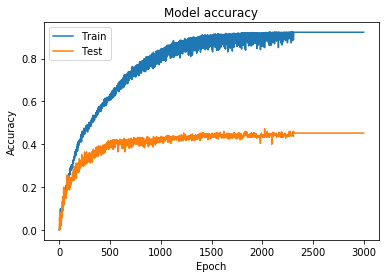

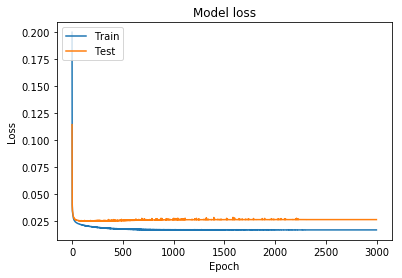

[[0.14817327 0.5579932  0.20553198 ... 0.         0.19816236 0.14510445]
 [0.10524443 0.06626    0.         ... 0.         0.04074496 0.        ]
 [0.16248389 0.00173675 0.29237533 ... 0.         0.46909133 0.03104921]
 ...
 [0.         0.5409508  0.12948956 ... 0.16445553 0.19267945 0.07125606]
 [0.21295565 0.06367995 0.5563506  ... 0.         0.         0.12654237]
 [0.24913552 0.07252724 0.         ... 0.         0.         0.        ]]


In [8]:
# No hiden layer. just fully connected
# sigmoid as activation function
model = Sequential([
    Dense(1536, input_dim=1536),
    Activation('relu'), 
    Dense(1536),
    Activation('relu'), 
    Dense(1536),
    Activation('hard_sigmoid'),  # ,sigmoid softmax
    #Dense(247),
    #Activation('relu'),
    #Dense(2470),
    #Activation('sigmoid')
])

# optimizer

rmsprop = RMSprop(lr=0.0001, rho=0.9, epsilon=1e-8, decay=0.0)


def mean_pred(y_true, y_pred):
    return K.mean(y_pred)


model.compile(
    optimizer=rmsprop,
    loss='mean_squared_error',
    metrics=['accuracy']  # , mean_pred]
)
print('Train-------------------------')

history = model.fit(X_train, y_train, validation_split=0.25, epochs=3000, shuffle = True, batch_size=75, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])
layer_output1 = get_3rd_layer_output([X_train])[0]

print(layer_output1)